# Amazon Customer Behavior Data Analysis and Clustering
This notebook will walk through the steps for cleaning the Amazon Customer Behavior dataset, performing exploratory data analysis (EDA), and applying K-Means clustering to segment customers.

## Step 1: Import Necessary Libraries
We'll start by importing the libraries required for data manipulation, visualization, and clustering.



In [16]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


## Step 2: Load the Dataset
Next, we'll load the dataset and inspect the first few rows.


In [17]:
# Step 2: Load the Dataset
data = pd.read_csv("C:\\Users\\Ogbemudia\\Downloads\\Amazon Customer Behavior Survey.csv")
data.head()


,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy


## Step 3: Check for Missing Data
Let's check if there is any missing data and handle it accordingly.


In [18]:
# Step 3: Check for Missing Data
missing_data = data.isnull().sum()
print("Missing Data:\n", missing_data)


Missing Data:
 Timestamp                                 0
age                                       0
Gender                                    0
Purchase_Frequency                        0
Purchase_Categories                       0
Personalized_Recommendation_Frequency     0
Browsing_Frequency                        0
Product_Search_Method                     2
Search_Result_Exploration                 0
Customer_Reviews_Importance               0
Add_to_Cart_Browsing                      0
Cart_Completion_Frequency                 0
Cart_Abandonment_Factors                  0
Saveforlater_Frequency                    0
Review_Left                               0
Review_Reliability                        0
Review_Helpfulness                        0
Personalized_Recommendation_Frequency     0
Recommendation_Helpfulness                0
Rating_Accuracy                           0
Shopping_Satisfaction                     0
Service_Appreciation                      0
Improvement_Areas

## Step 4: Handle Missing Data
For simplicity, we'll drop rows with missing values.


In [3]:
# Step 2: Load the Dataset
import pandas as pd

data = pd.read_csv("C:\\Users\\Ogbemudia\\Downloads\\Amazon Customer Behavior Survey.csv")

# Step 4: Handle Missing Data (Dropping for simplicity)
data.dropna(inplace=True)

# Check if the data is loaded correctly and has no missing values
print(data.head())
print(data.isnull().sum())


                        Timestamp  age             Gender  \
0  2023/06/04 1:28:19 PM GMT+5:30   23             Female   
1  2023/06/04 2:30:44 PM GMT+5:30   23             Female   
2  2023/06/04 5:04:56 PM GMT+5:30   24  Prefer not to say   
3  2023/06/04 5:13:00 PM GMT+5:30   24             Female   
4  2023/06/04 5:28:06 PM GMT+5:30   22             Female   

       Purchase_Frequency                                Purchase_Categories  \
0       Few times a month                           Beauty and Personal Care   
1            Once a month                               Clothing and Fashion   
2       Few times a month    Groceries and Gourmet Food;Clothing and Fashion   
3            Once a month  Beauty and Personal Care;Clothing and Fashion;...   
4  Less than once a month      Beauty and Personal Care;Clothing and Fashion   

  Personalized_Recommendation_Frequency Browsing_Frequency  \
0                                   Yes   Few times a week   
1                           

## Step 5: Standardize Timestamp Format
We'll ensure that the timestamp is in a standard format and remove timezone information.


In [5]:
# Step 5: Standardize Timestamp Format and Handle Errors
# Ensure proper datetime conversion with error handling
data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')

# Drop rows where conversion to datetime failed (if any)
data.dropna(subset=['Timestamp'], inplace=True)

# Step 9: Feature Engineering
# Create 'Timestamp_Hour' column now that 'Timestamp' is confirmed as datetime
data['Timestamp_Hour'] = data['Timestamp'].dt.hour

# Create 'Age_Group' column
bins = [0, 18, 30, 45, 60, 100]
labels = ['Under 18', '18-30', '31-45', '46-60', '60+']
data['Age_Group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)


## Step 6: Clean Categorical Data
We'll replace values like 'Prefer not to say' in the 'Gender' column with 'Other' for easier analysis.


In [6]:
# Step 6: Clean Categorical Data
data['Gender'] = data['Gender'].replace({'Prefer not to say': 'Other'})


## Step 7: Convert Columns to Appropriate Data Types
Ensure that the 'age' column is numeric and convert 'Gender' to a categorical type.


In [7]:
# Step 7: Convert Columns to Appropriate Data Types
data['age'] = pd.to_numeric(data['age'], errors='coerce')
data['Gender'] = data['Gender'].astype('category')


## Step 8: Remove Duplicate Rows
We'll remove any duplicate rows to ensure clean data.


In [8]:
# Step 8: Remove Duplicate Rows
data.drop_duplicates(inplace=True)


## Step 9: Feature Engineering
We'll create additional features like `Timestamp_Hour` and `Age_Group` for better insights.


In [9]:
# Step 9: Feature Engineering
# Create 'Timestamp_Hour' column
data['Timestamp_Hour'] = data['Timestamp'].dt.hour

# Create 'Age_Group' column
bins = [0, 18, 30, 45, 60, 100]
labels = ['Under 18', '18-30', '31-45', '46-60', '60+']
data['Age_Group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)


## Step 10: Exploratory Data Analysis (EDA)
We'll now perform exploratory data analysis with visualizations.


### Age Distribution
A histogram showing the distribution of age among customers.


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


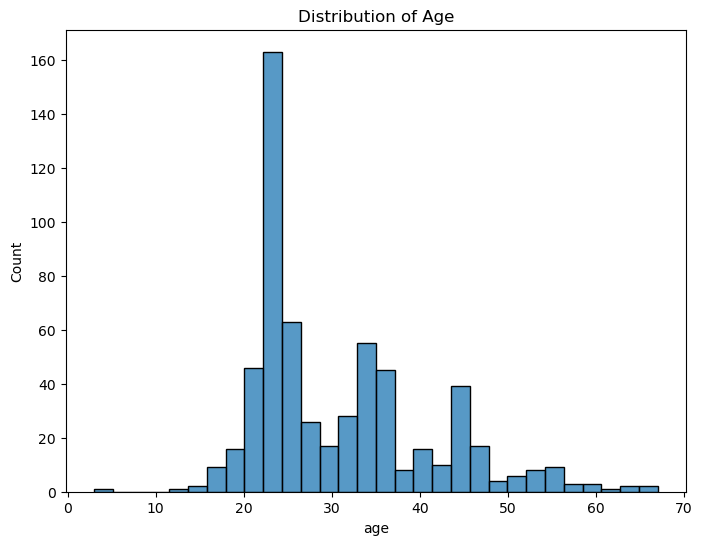

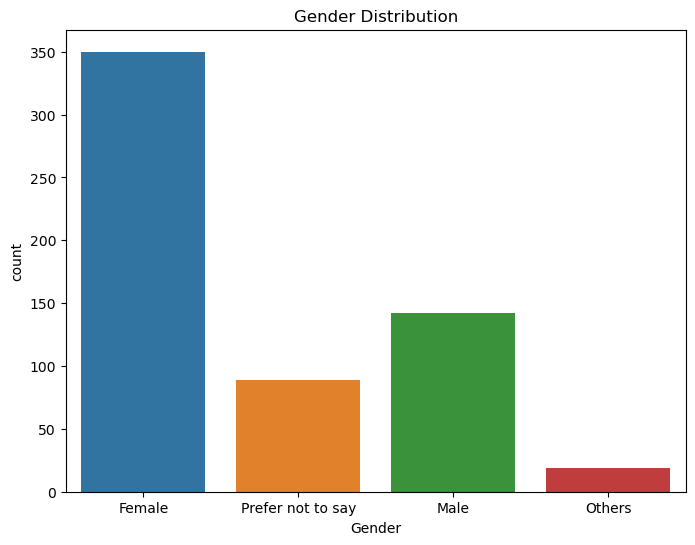

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
data = pd.read_csv("C:\\Users\\Ogbemudia\\Downloads\\Amazon Customer Behavior Survey.csv")

# Step 2: Replace inf values with NaN
data.replace([float('inf'), -float('inf')], pd.NA, inplace=True)

# Step 3: Handle missing data (Dropping NaN values for simplicity)
data.dropna(inplace=True)

# Step 4: Plotting the distribution of 'age'
plt.figure(figsize=(8, 6))
sns.histplot(data['age'].dropna(), bins=30)
plt.title("Distribution of Age")
plt.show()

# Step 5: Bar plot of 'Gender'
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=data)
plt.title("Gender Distribution")
plt.show()


### Correlation Heatmap
We'll plot a correlation heatmap to check relationships between numerical features.


# Filter numerical columns for correlation heatmap
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Heatmap to check correlations (only for numerical features)
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


## Step 11: Data Preprocessing for Clustering
We'll prepare the data for clustering by selecting relevant features and scaling them.


import numpy as np


In [10]:
# Step 11: Data Preprocessing for Clustering
# Select relevant features for clustering
clustering_features = ['age', 'Purchase_Frequency', 'Browsing_Frequency', 'Customer_Reviews_Importance']
# Make sure to convert categorical variables to numeric (using dummy variables)
data_clustering = pd.get_dummies(data[clustering_features], drop_first=True)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_clustering)


## Step 12: K-Means Clustering
We'll apply K-Means clustering to group customers into segments based on their behavior.


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values t

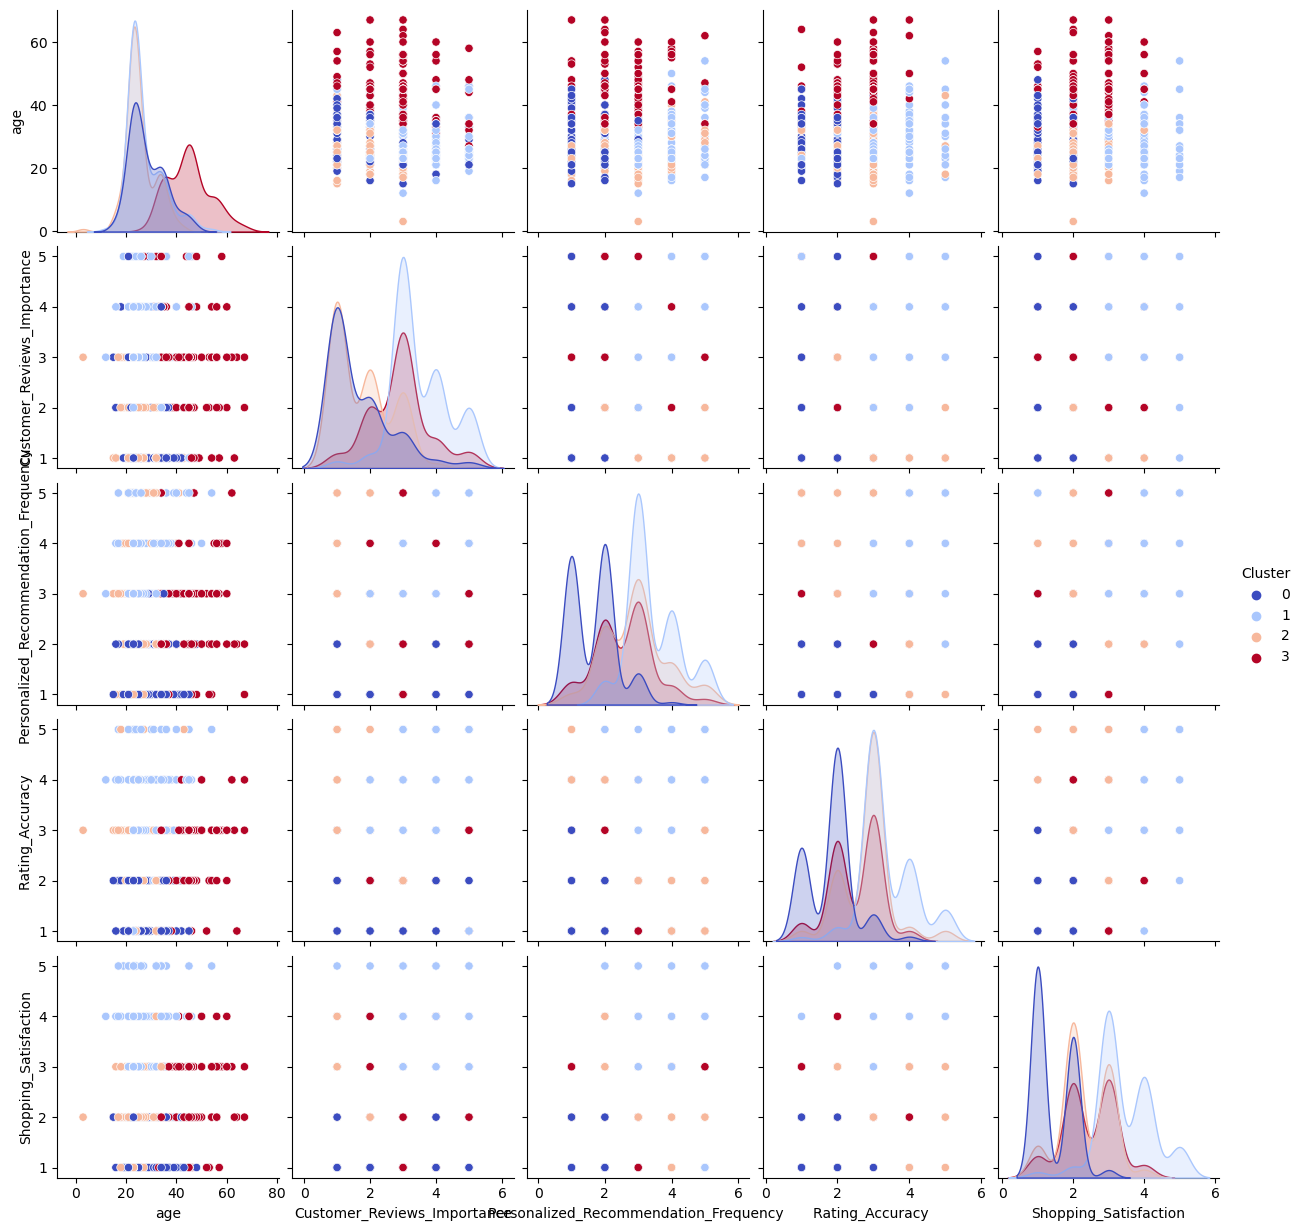

## Step 13: Add Cluster Labels to the DataFrame
We'll add the cluster labels to the original dataset for further analysis.



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


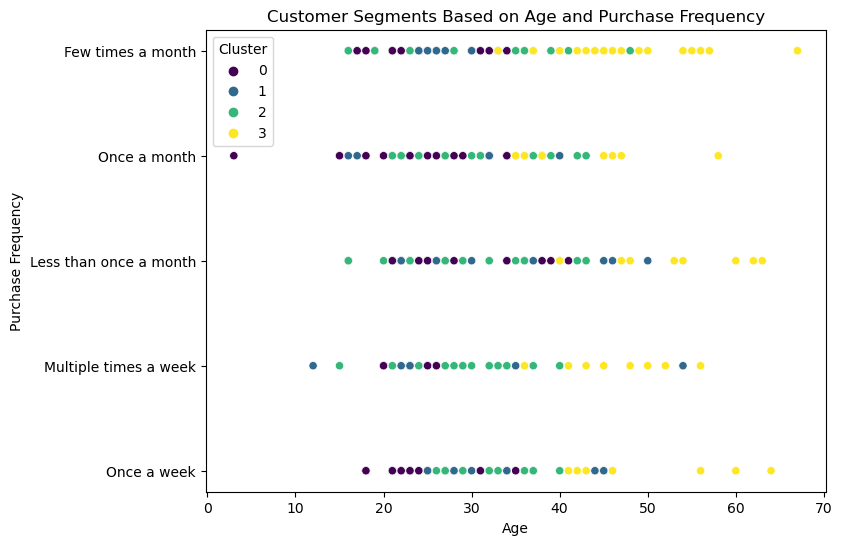

Cleaned data with clusters saved to 'cleaned_amazon_customer_data.csv'.


In [38]:
# Step 12: K-Means Clustering
# Choose the number of clusters (let's start with 4)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_data)

## Step 13: Add Cluster Labels to the DataFrame
# We'll add the cluster labels to the original dataset for further analysis.
data['Cluster'] = kmeans.labels_

## Step 14: Visualize the Clusters
# A scatter plot showing customer segments based on age and purchase frequency.
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='Purchase_Frequency', hue='Cluster', data=data, palette='viridis')
plt.title("Customer Segments Based on Age and Purchase Frequency")
plt.xlabel("Age")
plt.ylabel("Purchase Frequency")
plt.legend(title='Cluster')
plt.show()

## Step 15: Save the Cleaned Data
# Finally, we'll save the cleaned and processed data with cluster labels.
data.to_csv("cleaned_amazon_customer_data.csv", index=False)
print("Cleaned data with clusters saved to 'cleaned_amazon_customer_data.csv'.")
